# Question 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#pd.options.display.max_rows = 10000

***
## `a. Create a dataframe called chipo. Read chipotle.tsv.`
<br>

In [2]:
chipo = pd.read_csv("chipotle.tsv", sep='\t')

In [3]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


***
## `b. What is the number of observations in the dataset? `
<br>

In [4]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 126.4+ KB


***
## `c. What is the number of columns in the dataset?` 
<br>

In [5]:
chipo.shape[1]

5

***
## `d.  Print the name of all the columns. `
<br>

In [6]:
chipo_col = list(chipo.columns)
for col in chipo_col:
    print(col)

order_id
quantity
item_name
choice_description
item_price


***
## `e. Which was the most-ordered item? `
<br>

In [7]:
most_ordered_item = chipo.groupby(['item_name'], as_index=False).quantity.sum().sort_values(['quantity'], ascending=False)
most_ordered_item.iloc[0:1, 0:1]

,item_name
17,Chicken Bowl


In [8]:
#ab = chipo.groupby("item_name", as_index=False).agg({"quantity" : ["sum"]})

***
##  `f. For the most-ordered item, how many items were ordered? `
<br>

In [9]:
most_ordered_item.iloc[0:1, :]

,item_name,quantity
17,Chicken Bowl,761


***
## `g. What was the most ordered item in the choice_description column? `
<br>

In [10]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [11]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [12]:
most_choice_desc = chipo.groupby(['choice_description'], as_index=False).quantity.sum()
most_choice_desc = most_choice_desc.sort_values('quantity', ascending=False)
most_choice_desc.iloc[0:1, :]

,choice_description,quantity
15,[Diet Coke],159


In [13]:
chipo.groupby(['choice_description'], as_index=False).quantity.sum()
most_choice_desc.sort_values('quantity', ascending=False)

,choice_description,quantity
15,[Diet Coke],159
14,[Coke],143
583,[Sprite],89
256,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",49
257,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",42
...,...,...
966,"[[Fresh Tomato Salsa (Mild), Tomatillo-Red Chi...",1
795,"[Tomatillo Red Chili Salsa, [Rice, Sour Cream,...",1
914,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",1
913,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",1


***
## `h. How many items were ordered in total? `
<br>

In [14]:
#ordered_item_total = chipo.groupby(['item_name'], as_index=False).agg({'quantity': ['sum']})
chipo['quantity'].sum()

4972

***
## `i. Create a lambda function and change the type of item price. `
<br>

In [15]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 126.4+ KB


In [16]:
import timeit
%timeit chipo.apply(lambda x: float(x['item_price'].replace('$', '')), axis=1)
chipo['item_price'] = chipo.apply(lambda x: float(x['item_price'].replace('$', '')), axis=1)

27.1 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 144.5+ KB


***
## `j. How much was the revenue for the period in the dataset? `
<br>

In [18]:
revenues = chipo['item_price'] * chipo['quantity']
revenues.sum()

39237.02

***
## `k. How many orders were made in the period?`
<br>

In [19]:
chipo.head(25)
orders = chipo.groupby('order_id', as_index=False).agg({'quantity' : ['sum']})
len(orders)

1834

In [20]:
chipo.head(25)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


***
## `l. What is the average revenue amount per order? `
<br>

In [21]:
average_revenue = chipo['item_price'].mean()

In [22]:
#test
#per_order = round(chipo.groupby(['order_id'], as_index=False).item_price.mean(),2)
#per_order

In [23]:
#round(average_revenue,2)
#(chipo['item_price'] * chipo['quantity'])/chipo['quantity']

***
## `m. How many different items are sold? `
<br>

In [24]:
ordered_item_total = len(chipo['item_name'].unique())
ordered_item_total

50

In [25]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

***
## `n. How many products cost more than $10.00?`
<br>

In [26]:
exp = chipo['item_price'] > 10
len(chipo[exp])

1130

In [27]:
indx = chipo['quantity'] == 1
price_description = chipo[indx]
#price_description

***
## `o. What is the price of each item?  `
<br>

In [28]:
price = price_description.groupby(['item_name', 'choice_description', 'item_price'], dropna=False).count()

In [29]:
del price['order_id']

In [30]:
del price['quantity']

In [31]:
price

Empty DataFrame
Columns: []
Index: [(6 Pack Soft Drink, [Coke], 6.49), (6 Pack Soft Drink, [Diet Coke], 6.49), (6 Pack Soft Drink, [Lemonade], 6.49), (6 Pack Soft Drink, [Nestea], 6.49), (6 Pack Soft Drink, [Sprite], 6.49), (Barbacoa Bowl, [Fresh Tomato (Mild), [Lettuce, Black Beans, Rice]], 8.69), (Barbacoa Bowl, [Fresh Tomato (Mild), [Lettuce, Rice, Cheese]], 8.69), (Barbacoa Bowl, [Fresh Tomato Salsa (Mild), [Black Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]], 11.48), (Barbacoa Bowl, [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Lettuce]], 8.99), (Barbacoa Bowl, [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole]], 11.75), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Cheese]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Lettuce]], 9.25), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Fresh Tomato Salsa, [Rice, Fajita Vegetables, Black Beans, Sour Cream]], 9.25), (Barbacoa Bowl, [Guacamole], 11.49), (Barbacoa Bowl, [Roasted Chili Corn Salsa, [Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Roasted Chili Corn Salsa, [Fajita Vegetables, Rice, Guacamole]], 11.75), (Barbacoa Bowl, [Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]], 11.75), (Barbacoa Bowl, [Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]], 9.25), (Barbacoa Bowl, [Roasted Chili Corn Salsa, [Rice, Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Roasted Chili Corn Salsa], 9.25), (Barbacoa Bowl, [Tomatillo Green Chili Salsa, [Fajita Vegetables, Pinto Beans, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Tomatillo Green Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Guacamole]], 11.75), (Barbacoa Bowl, [Tomatillo Green Chili Salsa, [Rice, Cheese, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Black Beans, Cheese, Sour Cream, Guacamole]], 11.75), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Cheese, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Guacamole, Lettuce]], 11.75), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Black Beans, Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Black Beans, Cheese]], 9.25), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]], 11.75), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Sour Cream, Cheese]], 9.25), (Barbacoa Bowl, [Tomatillo Red Chili Salsa, [Rice, Pinto Beans, Cheese, Lettuce]], 9.25), (Barbacoa Bowl, [Tomatill

***
## `p. Sort by the name of the item.` 
<br>

In [32]:
chipo.sort_values(by=("item_name"), ascending=True)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


***
## `q. What was the quantity of the most expensive item ordered?`
<br>

In [33]:
chipo[chipo['item_price'] == chipo.item_price.max()]['quantity']

3598    15
Name: quantity, dtype: int64

In [34]:
chipo.item_price.max()

44.25

***
## `r. How many Veggie Salad Bowl orders were there?`
<br>

In [35]:
import re
chipo.loc[chipo['item_name'].str.contains(r'^Veggie Salad Bowl', flags=re.I, regex=True), 'item_name'].count()

18

***

## `s. How many times did people order more than one Canned Soda?`
<br>

In [36]:
chipo.groupby(['item_name'], as_index=False).order_id.count()

,item_name,order_id
0,6 Pack Soft Drink,54
1,Barbacoa Bowl,66
2,Barbacoa Burrito,91
3,Barbacoa Crispy Tacos,11
4,Barbacoa Salad Bowl,10
5,Barbacoa Soft Tacos,25
6,Bottled Water,162
7,Bowl,2
8,Burrito,6
9,Canned Soda,104


In [51]:
canned_soda = (chipo['item_name'].str.contains(r'^Canned Soda+', flags=re.I, regex=True)) & (chipo['quantity'] > 1)
canned_soda = chipo[canned_soda]
len(canned_soda)

20

***

## `t. Create a histogram of the top 5 items bought`
<br>

In [39]:
most_bought_item = chipo.groupby(['item_name'], as_index=False).quantity.sum()

In [40]:
most_bought_item = most_bought_item.sort_values(by='quantity', ascending=False).iloc[0:5, :]
most_bought_item

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


In [41]:
item_name_hist = list(most_bought_item['item_name'])
quantity_hist = list(most_bought_item['quantity'])

In [42]:
item_name_hist

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink']

In [43]:
quantity_hist

[761, 591, 506, 386, 351]

In [44]:
index = np.arange(len(item_name_hist))

In [45]:
bar_width = 0.5

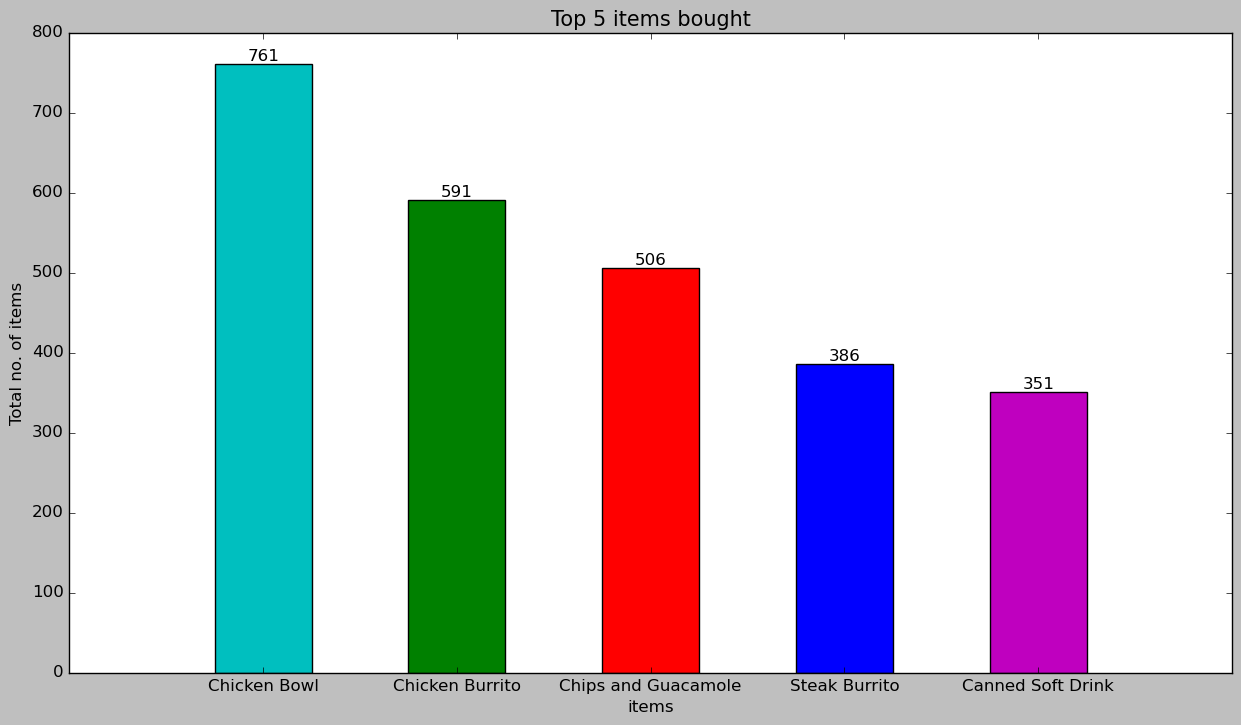

In [46]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va="bottom")

plt.style.use("classic")
fig = plt.figure(figsize=(15,8), dpi=100)
colors = ['c', 'g', 'r', 'b', 'm']
labels = [2,3,4,5,6]
plt.bar(index, quantity_hist, bar_width, color=colors)
plt.xticks(index, item_name_hist)
plt.xlabel("items")
plt.ylabel("Total no. of items")
plt.title("Top 5 items bought", fontsize=15)
addlabels(item_name_hist, quantity_hist)

***
## `u.	Create a scatterplot with the number of items ordered per order price. `
<br>

In [47]:
ordered_price = chipo.groupby(['item_price'], as_index=False).item_name.count().sort_values(by='item_name', ascending=False)
ordered_price

,item_price,item_name
38,8.75,730
47,11.25,521
41,9.25,398
20,4.45,349
35,8.49,311
...,...,...
19,4.36,1
33,7.98,1
32,7.50,1
27,6.45,1


In [48]:
itemprices = ordered_price['item_price']

In [49]:
num_of_items = ordered_price['item_name']

Text(0, 0.5, 'No. of items')

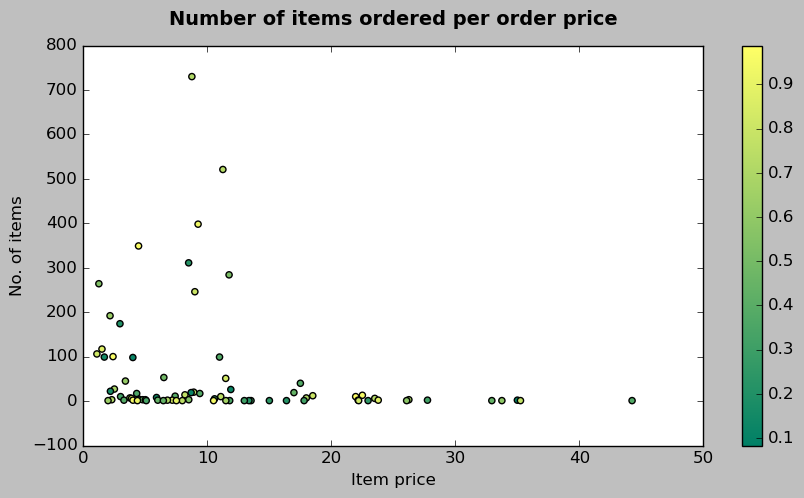

In [50]:
plt.figure(figsize=(10,5), dpi=100)
colors = np.random.rand(ordered_price.shape[0])
plt.style.use('classic')
plt.scatter(itemprices, num_of_items, c=colors, cmap=plt.cm.summer)
plt.colorbar()
plt.xlim(0,50)
plt.title("Number of items ordered per order price", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Item price")
plt.ylabel("No. of items")